<a href="https://colab.research.google.com/github/MontyGhost/ML_Knowledge/blob/master/CH_3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


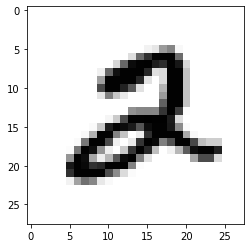

In [ ]:
plt.figure()
plt.imshow(train_images[5], cmap = plt.cm.binary)
#plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images[5].shape

(28, 28)

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0812 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0373 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0242 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0824 - accuracy: 0.9762

Test accuracy: 0.9761999845504761


In [ ]:
pred = model.predict(test_images)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
img = 205
pred[img]

array([1.1680356e-08, 2.8333130e-05, 5.3579100e-08, 9.9773347e-01,
       3.7076035e-07, 2.2117144e-03, 1.6977219e-09, 1.4180717e-06,
       1.9334197e-05, 5.3743529e-06], dtype=float32)

In [ ]:
np.argmax(pred[img])

3

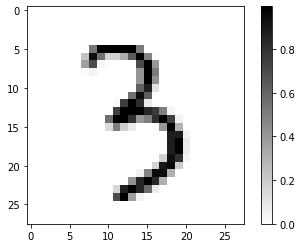

In [ ]:
plt.figure()
plt.imshow(test_images[img],cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
test_images[0].shape

(28, 28)

In [ ]:
test_labels[0]

7

In [ ]:
model.save("test_model.h5")

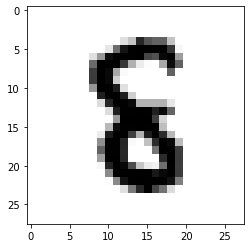

In [ ]:
import imageio
im = imageio.imread("https://storage.googleapis.com/kagglesdsdata/datasets%2F27469%2F35012%2Fmnist_png%2Ftesting%2F8%2F232.png?GoogleAccessId=databundle-worker-v2@kaggle-161607.iam.gserviceaccount.com&Expires=1597076160&Signature=tJ7e%2Bv2698%2BupyTtt%2F340yfwGq8nALvIjWrYck4G9%2BaO5Y5EzFosgC9OAFv8OTxIz6COqqDKrtZltvWtoPVJnOk%2FmSTFgqLYJuWJcWY%2BngtgOksD0f4yzO3Cmc%2F5dvOa7qNmsf8bBALThwiFlXm1e%2Fo5O%2FHVQH14kmPHqHJ%2FApzAve%2F5haVaGJCJjhClg2s5JzMGwPK2calzxeTsy3UAQkFxTgnuPfOKnqvscW7WiXBGY9M59j5Yb9%2F9CpKWN%2F1V2IiMuFk%2Fm6ewPpUjXRDZRKLEvqO%2B1Eqa8fDVhsV5KGuHC0GnlkWYe2T9m4ab2hkJDqpRRuRTciOhDLRAbiGKAQ%3D%3D")    #https://i.imgur.com/a3Rql9C.png
#im = imageio.imread("https://edwin-de-jong.github.io/blog/mnist-sequence-data/fig/5.png")
#plt.imshow(im)
plt.imshow(im, cmap = plt.cm.binary)

In [ ]:
im.shape

(1, 28)

In [ ]:
im = im[np.newaxis, :]
print(im.shape)

(1, 28, 28)


In [ ]:
from keras.models import load_model
model = load_model("test_model.h5")
prediction_im = model.predict(im)
print(np.argmax(prediction_im))

8
